In [70]:
pip install xlrd  #necessary to read the files in the personal Mac

Note: you may need to restart the kernel to use updated packages.


In [71]:
!pip install thefuzz

In [72]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [73]:
url = "/Users/elizavetazavartseva/Downloads/GSAF5.xls"

In [74]:
sharks_df = pd.read_excel(url)

## Cleaninig Data

In [77]:
#Cleaning Column Names

sharks_df.columns = pd.Series(sharks_df.columns).apply(lambda col: col.lower())
sharks_df.rename(columns = lambda x: x.replace(' ', '_'), inplace=True)

print(sharks_df.columns)

Index(['date', 'year', 'type', 'country', 'state', 'location', 'activity',
       'name', 'sex', 'age', 'injury', 'unnamed:_11', 'time', 'species_',
       'source', 'pdf', 'href_formula', 'href', 'case_number', 'case_number.1',
       'original_order', 'unnamed:_21', 'unnamed:_22'],
      dtype='object')


In [78]:
print(sharks_df.info())

sharks_df
#original Dataframe

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6969 entries, 0 to 6968
Data columns (total 23 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   date            6944 non-null   object 
 1   year            6942 non-null   float64
 2   type            6926 non-null   object 
 3   country         6894 non-null   object 
 4   state           6462 non-null   object 
 5   location        6379 non-null   object 
 6   activity        6358 non-null   object 
 7   name            6724 non-null   object 
 8   sex             6365 non-null   object 
 9   age             3950 non-null   object 
 10  injury          6909 non-null   object 
 11  unnamed:_11     6382 non-null   object 
 12  time            3418 non-null   object 
 13  species_        3812 non-null   object 
 14  source          6925 non-null   object 
 15  pdf             6799 non-null   object 
 16  href_formula    6819 non-null   object 
 17  href            6796 non-null   o

,date,year,type,country,state,location,activity,name,sex,age,...,species_,source,pdf,href_formula,href,case_number,case_number.1,original_order,unnamed:_21,unnamed:_22
0,15 Mar 2024,2024.0,Unprovoked,AUSTRALIA,Queensland,Bargara Beach,Swimming,Brooklyn Sauer,F,13,...,Tiger shark,"Yahoo News, 3/15/2024",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,04 Mar 2024,2024.0,Unprovoked,USA,Hawaii,"Old Man's, Waikiki",Surfing,Matthew White,M,NaN,...,Tiger shark 8',"Surfer, 3/6/2024F",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,02 Mar-2024,2024.0,Unprovoked,USA,Hawaii,"Rainbows, Oahu",Swimming,NaN,F,11,...,3' to 4' shark,"Hawaii News Now, 3/4/2024",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,25 Feb-2024,2024.0,Unprovoked,AUSTRALIA,Western Australia,"Sandlnd Island, Jurian Bay",NaN,female,F,46,...,Tiger shark,"WA Today, 2/26/2024",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,14 Feb-2024,2024.0,Unprovoked,INDIA,Maharashtra,"Vaitarna River, Palghar District",Fishing,Vicky Suresh Govari,M,32,...,"Bull shark, 7'","Times of India, 2/14/2024",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6964,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,http://sharkattackfile.net/spreadsheets/pdf_di...,NaN,NaN,NaN,NaN,NaN,NaN
6965,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,http://sharkattackfile.net/spreadsheets/pdf_di...,NaN,NaN,NaN,NaN,NaN,NaN
6966,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,http://sharkattackfile.net/spreadsheets/pdf_di...,NaN,NaN,NaN,NaN,NaN,NaN
6967,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,http://sharkattackfile.net/spreadsheets/pdf_di...,NaN,NaN,NaN,NaN,NaN,NaN


In [79]:
#Column: date

import datetime as dt   
#it's nessesary for work with date

sharks_df.dropna(subset="date", inplace=True)    
#delete all null values

sharks_df["date"] = sharks_df["date"] \
    .str.replace("-", " ") \
    .str.replace("Nox", "Nov") \
    .str.extract(".*(\d{2} [a-zA-Z]{3} \d{4}).*")
    # .str.apply(lambda x: dt.datetime.strptime(x,'%d %b %Y'))



# print(tmp_sharks_df["Date"])
# tmp_sharks_df["Date"] = tmp_sharks_df["Date"].apply(lambda x: dt.datetime.strptime(x,'%d %b %Y') if type(x)==str else pd.NaT)
# print(tmp_sharks_df["Date"])


sharks_df["date"] = pd.to_datetime(sharks_df["date"], format="%d %b %Y", errors='coerce')
sharks_df.dropna(subset="date", inplace=True)

In [80]:
print(sharks_df.info())

#Data Type after clining column Data

<class 'pandas.core.frame.DataFrame'>
Index: 5976 entries, 0 to 6932
Data columns (total 23 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   date            5976 non-null   datetime64[ns]
 1   year            5974 non-null   float64       
 2   type            5960 non-null   object        
 3   country         5947 non-null   object        
 4   state           5648 non-null   object        
 5   location        5610 non-null   object        
 6   activity        5561 non-null   object        
 7   name            5814 non-null   object        
 8   sex             5534 non-null   object        
 9   age             3738 non-null   object        
 10  injury          5954 non-null   object        
 11  unnamed:_11     5497 non-null   object        
 12  time            3297 non-null   object        
 13  species_        3423 non-null   object        
 14  source          5961 non-null   object        
 15  pdf      

In [81]:
#Add new colimn: month
sharks_df['month'] = sharks_df['date'].dt.month

In [82]:
#Add new colimn: month
sharks_df['year'] = sharks_df['date'].dt.year

In [83]:
#Column: year

#Updated it earlier.

In [84]:
#Column: type

sharks_df['type'] = sharks_df['type'].str.capitalize().str.strip()


In [85]:
replace_dict = {
    'Questionable': 'Indefined',
    'Unconfirmed': 'Indefined',
    'Invalid': 'Indefined',
    'Unverified': 'Indefined',
    'Under investigation': 'Indefined',
    'Boat': 'Indefined',
    '?': 'Indefined'

}

sharks_df['type'] = sharks_df['type'].replace(replace_dict)

sharks_df.type.fillna('Indefined', inplace = True)

#Sometimes we need to run it twice.

In [86]:
#Types after cleaning

sharks_df['type'].unique()

#Replaced NaN to 'Indefined'
#Replaced 'Questionable', 'Unconfirmed', 'Unverified', 'Invalid', 'Under investigation' ... -> 'Indefined'

array(['Unprovoked', 'provoked', 'Provoked', 'Indefined', 'Watercraft',
       'Sea disaster'], dtype=object)

In [87]:
#Column: country
#Check how many null values in column "country"
print(f'Column "country" has {sharks_df.country.isna().sum()} null values.')

Column "country" has 29 null values.


In [88]:
#Column: country
sharks_df.dropna(subset="country", inplace=True)

#Deleting rows with null values in country.

In [107]:
#Column: country

sharks_df['country'] = sharks_df['country'].str.upper().str.strip()

In [109]:
#Column: country

from thefuzz import process

# Define the list of standard country names
standard_countries = [
    'AUSTRALIA', 'USA', 'INDIA', 'TRINIDAD', 'BAHAMAS', 'SOUTH AFRICA', 'MEXICO', 'NEW ZEALAND', 'EGYPT', 'BELIZE',
    'PHILIPPINES', 'CORAL SEA', 'SPAIN', 'PORTUGAL', 'SAMOA', 'COLOMBIA', 'ECUADOR', 'FRENCH POLYNESIA', 'NEW CALEDONIA',
    'TURKS AND CAICOS', 'CUBA', 'BRAZIL', 'SEYCHELLES', 'ARGENTINA', 'FIJI', 'MALDIVES', 'ENGLAND', 'JAPAN', 'INDONESIA',
    'JAMAICA', 'THAILAND', 'COLUMBIA', 'COSTA RICA', 'BRITISH OVERSEAS TERRITORY', 'CANADA', 'JORDAN', 'ST KITTS AND NEVIS',
    'ST MARTIN', 'PAPUA NEW GUINEA', 'REUNION ISLAND', 'ISRAEL', 'CHINA', 'IRELAND', 'ITALY', 'MALAYSIA', 'LIBYA', 'MAURITIUS',
    'SOLOMON ISLANDS', 'COMOROS', 'UNITED KINGDOM', 'UNITED ARAB EMIRATES', 'CAPE VERDE', 'DOMINICAN REPUBLIC', 'CAYMAN ISLANDS',
    'ARUBA', 'MOZAMBIQUE', 'PUERTO RICO', 'ATLANTIC OCEAN', 'GREECE', 'FRANCE', 'TRINIDAD & TOBAGO', 'KIRIBATI', 'DIEGO GARCIA',
    'TAIWAN', 'PALESTINIAN TERRITORIES', 'GUAM', 'NIGERIA', 'TONGA', 'SCOTLAND', 'CROATIA', 'SAUDI ARABIA', 'CHILE', 'ANTIGUA',
    'KENYA', 'RUSSIA', 'UNITED ARAB EMIRATES (UAE)', 'AZORES', 'SOUTH KOREA', 'MALTA', 'VIETNAM', 'MADAGASCAR', 'PANAMA', 'SOMALIA',
    'NEVIS', 'BRITISH VIRGIN ISLANDS', 'NORWAY', 'SENEGAL', 'YEMEN', 'GULF OF ADEN', 'SIERRA LEONE', 'LIBERIA', 'VANUATU',
    'HONDURAS', 'VENEZUELA', 'SRI LANKA', 'URUGUAY', 'MICRONESIA', 'CARIBBEAN SEA', 'OKINAWA', 'TANZANIA', 'MARSHALL ISLANDS',
    'NORTHERN ARABIAN SEA', 'HONG KONG', 'EL SALVADOR', 'ANGOLA', 'BERMUDA', 'MONTENEGRO', 'IRAN', 'TUNISIA', 'NAMIBIA',
    'NORTH ATLANTIC OCEAN', 'SOUTH CHINA SEA', 'BANGLADESH', 'PALAU', 'WESTERN SAMOA', 'PACIFIC OCEAN', 'BRITISH ISLES', 'GRENADA',
    'IRAQ', 'TURKEY', 'SINGAPORE', 'NEW BRITAIN', 'SUDAN', 'JOHNSTON ISLAND', 'SOUTH PACIFIC OCEAN', 'NEW GUINEA', 'RED SEA',
    'NORTH PACIFIC OCEAN', 'FEDERATED STATES OF MICRONESIA', 'MID ATLANTIC OCEAN', 'ADMIRALTY ISLANDS', 'BRITISH WEST INDIES',
    'SOUTH ATLANTIC OCEAN', 'PERSIAN GULF', 'NICARAGUA', 'MALDIVE ISLANDS', 'AMERICAN SAMOA', 'GABON', 'MAYOTTE', 'THE BALKANS',
    'MARTINIQUE', 'INDIAN OCEAN', 'GUATEMALA', 'NETHERLANDS ANTILLES', 'NORTHERN MARIANA ISLANDS', 'JAVA', 'SLOVENIA',
    'CURACAO', 'ICELAND', 'BARBADOS', 'MONACO', 'GUYANA', 'HAITI', 'SAN DOMINGO', 'KUWAIT', 'FALKLAND ISLANDS', 'CRETE',
    'CYPRUS', 'WEST INDIES', 'BURMA', 'LEBANON', 'PARAGUAY', 'BRITISH NEW GUINEA', 'CEYLON', 'OCEAN', 'GEORGIA', 'SYRIA', 'TUVALU',
    'GUINEA', 'ANDAMAN ISLANDS', 'COOK ISLANDS', 'TOBAGO', 'PERU', 'AFRICA', 'ALGERIA', 'COAST OF AFRICA', 'TASMAN SEA',
    'GHANA', 'GREENLAND', 'MEDITERRANEAN SEA', 'SWEDEN', 'ROATAN', 'DJIBOUTI', 'BAHREIN', 'KOREA', 'ASIA'
]
# Define the fuzzy match function

def fuzzy_match(country, choices, scorer, cutoff=80):
    if isinstance(country, str):  # Ensure the country is a string
        match, score = process.extractOne(country, choices, scorer=scorer)
        if score >= cutoff:
            return match
    return country  # Return original value if no match or not a string
    
# Apply the fuzzy match function to the 'country' column
sharks_df['country'] = sharks_df['country'].apply(lambda x: fuzzy_match(x, standard_countries, scorer=process.fuzz.token_sort_ratio))


In [111]:
#Column: state

sharks_df['state'] = sharks_df['state'].str.upper().str.strip()

In [117]:
#Column: state

#Check how many null values in column "state"
print(f'Column "state" has {sharks_df.state.isna().sum()} null values.')

#We keep it. Last priority.

Column "state" has 307 null values.


In [119]:
#Column: state

sharks_df.state.fillna('Indefined', inplace = True)

In [121]:
#Column: state

#Check how many null values in column "state"
print(f'Column "state" has {sharks_df.state.isna().sum()} null values.')

#We keep it. Last priority.

Column "state" has 0 null values.


In [123]:
#Column: location

sharks_df['location'] = sharks_df['location'].str.upper().str.strip()

In [125]:
#Column: location

#Check how many null values in column "location"
print(f'Column "location" has {sharks_df.location.isna().sum()} null values.')

Column "location" has 345 null values.


In [127]:
#Column: location

sharks_df.location.fillna('Indefined', inplace = True)

#We keep it. Last priority.

In [129]:
#Column: location

#Check how many null values in column "country"
print(f'Column "location" has {sharks_df.location.isna().sum()} null values.')

Column "location" has 0 null values.


In [131]:
#Column: activity

sharks_df.dropna(subset="activity", inplace=True)
# tmp_sharks_df["Activity"].apply(lambda x: " ".join(x.split(" ")[:3:])).apply(lambda x: x if len(x.split()} > 2 else "").value_counts()
sharks_df["activity"] = sharks_df["activity"] \
    .str.replace(" for", "") \
    .str.replace(" a ", " ") \
    .str.replace(" on", "") \
    .str.replace(" and", "") \
    .str.replace(" or", "") \
    .str.replace(" of", "") \
    .str.replace(" with", "") \
    .str.replace(" the", "") \
    .str.replace(" from", "") \
    .str.replace(" in", "") \
    .str.replace(" his", "") \
    .str.replace(" her", "") \
    .str.replace(" to", "") \
    .str.replace(" &", "") \
    .str.replace(" /", "") \
    .str.replace("Freediving", "Free diving") \
    .str.capitalize() \
    .str.strip() \
    .apply(lambda x: " ".join(x.split(" ")[:3:])) \
    .str.strip()

print(sharks_df.activity.value_counts())

activity
Surfing                        1082
Swimming                        916
Fishing                         441
Spearfishing                    315
Wading                          158
                               ... 
Boat ship josephine               1
Swimming alongside schooner       1
Wreck aphrodite                   1
Dragging shark                    1
Bathing/swimming                  1
Name: count, Length: 1202, dtype: int64


In [133]:
#Column: name

sharks_df.drop('name', axis=1, inplace=True)

#Deleted this column.

In [135]:
#Column: injury

sharks_df.drop('injury', axis=1, inplace=True)

#Deleted this column.

In [137]:
#Column: unnamed:_11

sharks_df.drop('unnamed:_11', axis=1, inplace=True)

#Deleted this column.

In [139]:
#Column: sex

sharks_df["sex"].replace(' M','M', inplace=True)        
sharks_df["sex"].replace('M ','M', inplace=True)
sharks_df["sex"].replace('M x 2','M', inplace=True)
sharks_df["sex"].replace('N','M', inplace=True) 
sharks_df["sex"].replace('lli','M', inplace=True) 
sharks_df["sex"].replace('.','M', inplace=True) 
sharks_df['sex'].fillna(sharks_df['sex'].mode()[0], inplace=True)


sharks_df["sex"].unique() 

array(['F', 'M'], dtype=object)

In [116]:
#Column: age

sharks_df["age"].unique() 

array(['13', nan, '11', '32', '29', '10', '64', '62', '39', '22', '15',
       '16', '46', '21', '20', '44', '26', '47', '66', '55', '30', '59',
       '8', '50', '52', '45', '34', '38', '30s', '37', '9', '19', '35',
       '65', '20s', '77', '60', 38, '49', '42', '!2', '24', '73', '25',
       '18', '50s', '58', '67', '17', '14', '6', '41', '53', '68', '43',
       '40', '51', '31', 39, 26, 58, 51, 14, 17, 10, 13, 33, 16, 41, 60,
       28, '40s', 68, 35, 62, 20, 8, 32, 'Teen', 12, 56, 21, 42, 36, 18,
       50, 'M', 9, 24, 15, 11, 27, 57, 34, 25, '!6', 31, 64, '!!', 47, 55,
       19, 7, 71, 48, 59, 53, 54, 75, '45 and 15', 46, 61, 73, 52, 40, 29,
       30, 70, 23, 22, 4, 63, 45, 37, 44, '28 & 22', '22, 57, 31', 49,
       "20's", 43, 65, 67, 74, '9 & 60', '60s', 'a minor', 6, 3, 69, 82,
       66, 72, '23', '12', '36', '63', '71', '48', '70', '18 months',
       '57', '7', '28', '33', '61', 'teen', '74', '27', '56', '28 & 26',
       '5', '54', '86', '18 or 20', '12 or 13', '46 & 3

In [152]:
#Column: age

sharks_df['age'].str.strip()
sharks_df["age"].replace('teen','10', inplace=True)
sharks_df["age"].replace('teen','10', inplace=True)
sharks_df["age"].replace('Teen','10', inplace=True)
sharks_df["age"].replace('20/30','25', inplace=True)
sharks_df["age"].replace('20/30','25', inplace=True)
sharks_df["age"] = sharks_df["age"].str.replace('s','')
sharks_df["age"] = sharks_df["age"].str.replace('!','')
sharks_df["age"] = sharks_df["age"].str.replace('?','')
sharks_df["age"].replace('a minor','14', inplace=True)
sharks_df["age"].replace('18 month','2', inplace=True)
sharks_df["age"].replace('>50','55', inplace=True)
sharks_df["age"].replace('adult','40', inplace=True)
sharks_df["age"].replace('(adult)','40', inplace=True)
sharks_df["age"].replace('M','0', inplace=True)
sharks_df["age"].replace("''",'0', inplace=True)
sharks_df["age"].replace('45 and 15','30', inplace=True)
sharks_df["age"].replace('28 & 22','25', inplace=True)
sharks_df["age"].replace('22, 57, 31','37', inplace=True)
sharks_df["age"].replace("20'",'20', inplace=True)
sharks_df["age"].replace('9 & 60','35', inplace=True)
sharks_df["age"].replace('18 or 20','18', inplace=True)
sharks_df["age"].replace('28 & 26','27', inplace=True)
sharks_df["age"].replace('12 or 13','13', inplace=True)
sharks_df["age"].replace('46 & 34','40', inplace=True)
sharks_df["age"].replace('28, 23 & 30','27', inplace=True)
sharks_df["age"].replace('36 & 26','31', inplace=True)
sharks_df["age"].replace('30 or 36','30', inplace=True)
sharks_df["age"].replace('6½','7', inplace=True)
sharks_df["age"].replace('21 & ','21', inplace=True)
sharks_df["age"].replace('8 or 10','8', inplace=True)
sharks_df["age"].replace('23 & 20','21', inplace=True)
sharks_df["age"].replace('7      &    31','19', inplace=True)
sharks_df["age"].replace('32 & 30','31', inplace=True)
sharks_df["age"].replace('Elderly','70', inplace=True)
sharks_df["age"].replace('\xa0 ','0', inplace=True)
sharks_df["age"].replace('37, 67, 35, 27,   & 27','39', inplace=True)
sharks_df["age"].replace(' ','0', inplace=True)
sharks_df["age"].replace('21 or 26','26', inplace=True)
sharks_df["age"].replace('18 to 22','20', inplace=True)
sharks_df["age"].replace('9 & 12','11', inplace=True)
sharks_df["age"].replace(' & 19','19', inplace=True)
sharks_df["age"].replace('33 & 37','35', inplace=True)
sharks_df["age"].replace('21, 34,24 & 35','29', inplace=True)
sharks_df["age"].replace('25 or 28','25', inplace=True)
sharks_df["age"].replace('30 & 32','31', inplace=True)
sharks_df["age"].replace('50 & 30','40', inplace=True)
sharks_df["age"].replace('17 & 35','26', inplace=True)
sharks_df["age"].replace('X','0', inplace=True)
sharks_df["age"].replace('13 or 18','15', inplace=True)
sharks_df["age"].replace('"young"','15', inplace=True)
sharks_df["age"].replace('17 & 16','16', inplace=True)
sharks_df["age"].replace('Both 11','11', inplace=True)
sharks_df["age"].replace('9 or 10','10', inplace=True)
sharks_df["age"].replace('33 & 26','30', inplace=True)
sharks_df["age"].replace('MAKE LINE GREEN','0', inplace=True)
sharks_df["age"].replace('F','0', inplace=True)
sharks_df["age"].replace('young','0', inplace=True)
sharks_df["age"].replace('36 & 23','0', inplace=True)
sharks_df["age"].replace('  ','0', inplace=True)
sharks_df["age"].replace('A.M.','0', inplace=True)
sharks_df["age"].replace('    &   14','0', inplace=True)
sharks_df["age"].replace('10 or 12','10', inplace=True)
sharks_df["age"].replace('31 or 33','32', inplace=True)
sharks_df["age"].replace('2½','3', inplace=True)
sharks_df["age"].replace('33 or 37','35', inplace=True)
sharks_df["age"].replace('','0', inplace=True)

sharks_df['age'] = sharks_df['age'].str.strip()

sharks_df["age"].unique() 

#Sometimes we need to do it twice.

array(['13', '15', '11', '32', '29', '10', '64', '62', '39', '22', '16',
       '46', '21', '20', '44', '26', '47', '66', '55', '30', '59', '8',
       '50', '52', '45', '34', '38', '37', '9', '19', '35', '65', '77',
       '60', '49', '42', '2', '24', '73', '25', '18', '58', '67', '17',
       '14', '6', '41', '53', '68', '43', '40', '51', '31', '0', '23',
       '12', '36', '63', '71', '48', '70', '57', '7', '28', '33', '61',
       '74', '27', '56', '5', '54', '86', '69', '87', '4', '81', '3',
       '78'], dtype=object)

In [154]:
#Column: age

sharks_df['age'].fillna(sharks_df['age'].mode()[0], inplace=True)

In [156]:
#Column: age

sharks_df["age"].unique()

array(['13', '15', '11', '32', '29', '10', '64', '62', '39', '22', '16',
       '46', '21', '20', '44', '26', '47', '66', '55', '30', '59', '8',
       '50', '52', '45', '34', '38', '37', '9', '19', '35', '65', '77',
       '60', '49', '42', '2', '24', '73', '25', '18', '58', '67', '17',
       '14', '6', '41', '53', '68', '43', '40', '51', '31', '0', '23',
       '12', '36', '63', '71', '48', '70', '57', '7', '28', '33', '61',
       '74', '27', '56', '5', '54', '86', '69', '87', '4', '81', '3',
       '78'], dtype=object)

In [158]:
#Column: age

sharks_df['age'] = sharks_df['age'].astype(int)

In [160]:
#Column: age

sharks_df.dtypes

date              datetime64[ns]
year                       int32
type                      object
country                   object
state                     object
location                  object
activity                  object
sex                       object
age                        int64
time                      object
species_                  object
source                    object
pdf                       object
href_formula              object
href                      object
case_number               object
case_number.1             object
original_order           float64
unnamed:_21               object
unnamed:_22               object
month                      int32
dtype: object

In [130]:
#Column: time

sharks_df.drop('time', axis=1, inplace=True)

In [131]:
#Column: pdf 

sharks_df.drop('pdf', axis=1, inplace=True)

In [132]:
#Column: href_formula 

sharks_df.drop('href_formula', axis=1, inplace=True)

In [133]:
#Column: href 

sharks_df.drop('href', axis=1, inplace=True)

In [134]:
#Column: case_number

sharks_df.drop('case_number', axis=1, inplace=True)

In [135]:
#Column: case_number.1  

sharks_df.drop('case_number.1', axis=1, inplace=True)

In [136]:
#Column: original_order

sharks_df.drop('original_order', axis=1, inplace=True)

In [137]:
#Column: unnamed:_21

sharks_df.drop('unnamed:_21', axis=1, inplace=True)

In [138]:
#Column: unnamed:_22

sharks_df.drop('unnamed:_22', axis=1, inplace=True)

In [139]:
sharks_df

,date,year,type,country,state,location,activity,sex,age,species_,source,month
0,2024-03-15,2024,Unprovoked,AUSTRALIA,QUEENSLAND,BARGARA BEACH,Swimming,F,13,Tiger shark,"Yahoo News, 3/15/2024",3
1,2024-03-04,2024,Unprovoked,USA,HAWAII,"OLD MAN'S, WAIKIKI",Surfing,M,15,Tiger shark 8',"Surfer, 3/6/2024F",3
2,2024-03-02,2024,Unprovoked,USA,HAWAII,"RAINBOWS, OAHU",Swimming,F,11,3' to 4' shark,"Hawaii News Now, 3/4/2024",3
4,2024-02-14,2024,Unprovoked,INDIA,MAHARASHTRA,"VAITARNA RIVER, PALGHAR DISTRICT",Fishing,M,32,"Bull shark, 7'","Times of India, 2/14/2024",2
5,2024-02-04,2024,provoked,TRINIDAD,FLORIDA,Indefined,Spearfishing,M,15,Blacktip reef shark,"Trinidad Guardian, 2/11/2014",2
...,...,...,...,...,...,...,...,...,...,...,...,...
6794,1703-03-26,1703,Unprovoked,BARBADOS,SOUTHWEST COAST,CARLISLE BAY,Swimming,M,19,NaN,"W.R.Cutter, Vol.1, p.252",3
6888,1959-04-24,1959,Unprovoked,BERMUDA,PAGET,PAGET PARISH,Spearfishing,M,15,NaN,Mentioned in letter from L. S. Mowbray dated 4...,4
6930,1916-07-17,1916,Unprovoked,USA,NORTH CAROLINA,SOMEWHERE BETWEEN HATTERAS AND BEAUFORT,Swimming,M,15,NaN,"C. Creswell, GSAF; Wilmington Star, 7/17/1916",7
6931,1913-07-19,1913,Unprovoked,SOUTH AFRICA,KWAZULU-NATAL,DURBAN,Fishing,M,15,NaN,"Rural New Yorker, 7/19/1913",7


## Graphs

Text(0.5, 1.0, 'Top 10 countries - all df')

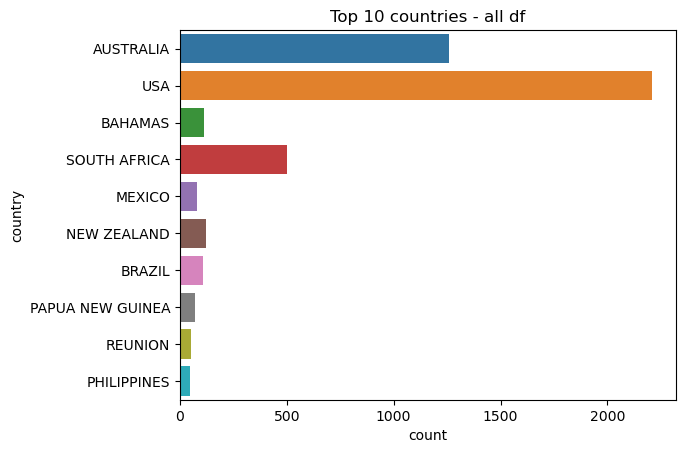

In [165]:
# Bar chart - top_10_countries
country_counts = sharks_df['country'].value_counts()                  # Count the occurrences of each country
top_10_countries = country_counts.head(10).index                      # Top 10
filtered_df = sharks_df[sharks_df['country'].isin(top_10_countries)]  # Filter the DataFrame to include only the top 10 countries
sns.countplot(y='country', data=filtered_df)                          # Bar chart
plt.title("Top 10 countries - all df")

Text(0.5, 1.0, 'Top 10 countries from 2000 to 2023')

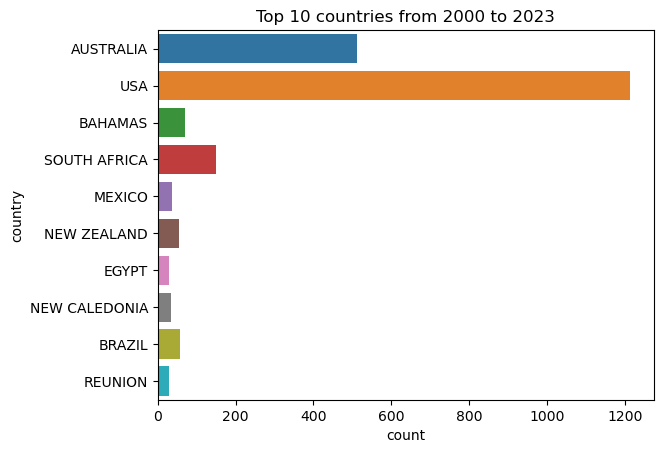

In [173]:
# Bar chart - top_10_countries
country_counts = df_00_23['country'].value_counts()                  # Count the occurrences of each country
top_10_countries = country_counts.head(10).index                      # Top 10
filtered_df = df_00_23[df_00_23['country'].isin(top_10_countries)]  # Filter the DataFrame to include only the top 10 countries
sns.countplot(y='country', data=filtered_df)                          # Bar chart
plt.title("Top 10 countries from 2000 to 2023")

Text(0.5, 1.0, 'MEN ARE MOSTLY ATTACKED BY SHARKS - all df')

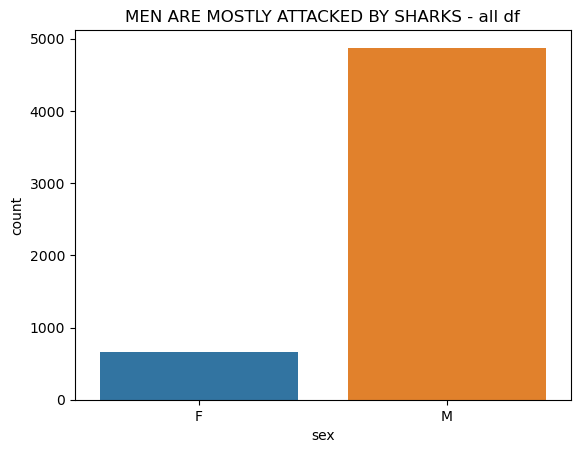

In [175]:
#MEN ARE MOSTLY ATTACKED BY SHARKS
sns.countplot(x='sex', data = sharks_df) 

plt.title("MEN ARE MOSTLY ATTACKED BY SHARKS - all df")


Text(0.5, 1.0, 'MEN ARE MOSTLY ATTACKED BY SHARKS')

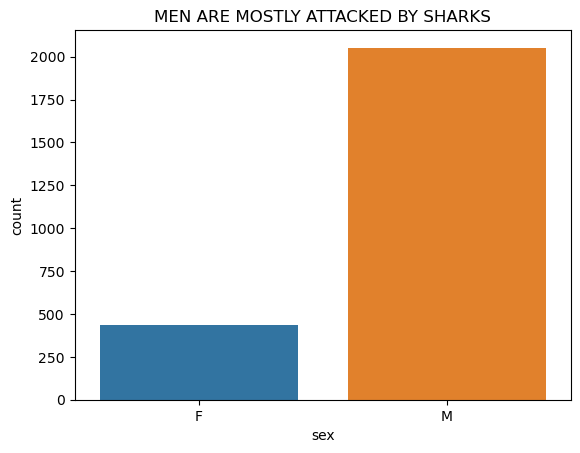

In [177]:
#MEN ARE MOSTLY ATTACKED BY SHARKS
sns.countplot(x='sex', data = df_00_23) 

plt.title("MEN ARE MOSTLY ATTACKED BY SHARKS")


Text(0.5, 1.0, 'MOST SHARK ATTACKS OCCUR DURING SURFING ACTIVITIES all df')

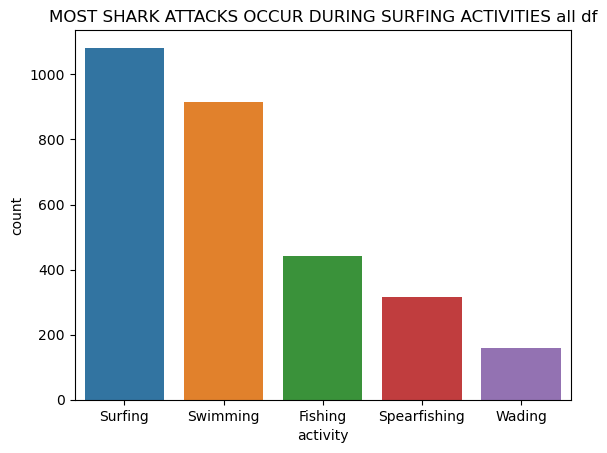

In [179]:
activity_counts = sharks_df['activity'].value_counts()
top_5_activity = activity_counts.head(5).index
filtered_top_activity = sharks_df[sharks_df['activity'].isin(top_5_activity)]
sorted_activities = activity_counts.loc[top_5_activity].index
sns.countplot(x='activity', data=filtered_top_activity, order=sorted_activities)
plt.title("MOST SHARK ATTACKS OCCUR DURING SURFING ACTIVITIES all df")

Text(0.5, 1.0, 'MOST SHARK ATTACKS OCCUR DURING SURFING ACTIVITIES ')

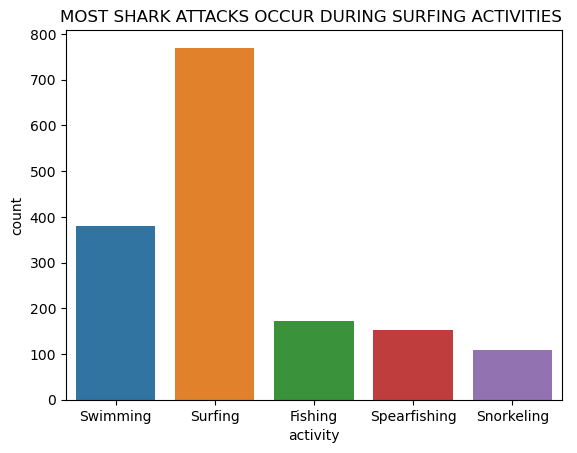

In [181]:
#MOST SHARK ATTACKS OCCUR DURING SURFING ACTIVITIES 
activity_counts = df_00_23['activity'].value_counts()                            # Count the occurrences of each country
top_5_activity = activity_counts.head(5).index                                    # Top 10
filtered_top_activity = df_00_23[df_00_23['activity'].isin(top_5_activity)]     # Filter the DataFrame to include only the top x
sns.countplot(x='activity', data=filtered_top_activity)                           # Bar chart
plt.title("MOST SHARK ATTACKS OCCUR DURING SURFING ACTIVITIES ")

Text(0.5, 1.0, 'MOST SHARK ATTACKS OCCUR DURING SURFING ACTIVITIES AND ON MEN - all df')

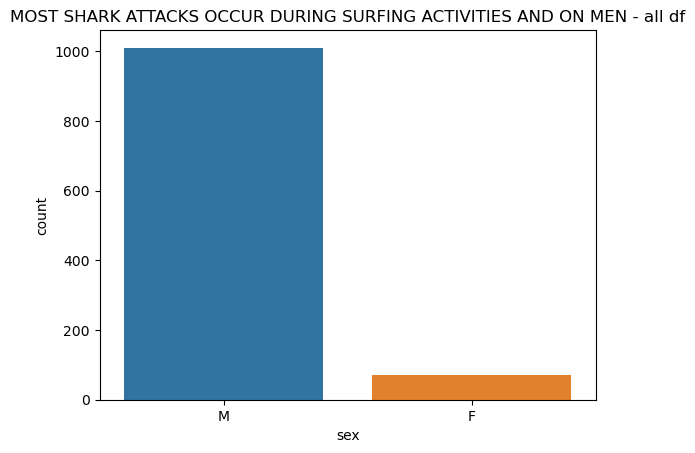

In [183]:
# MOST SHARK ATTACKS OCCUR DURING SURFING ACTIVITIES AND ON MEN 
df_surfing = sharks_df[sharks_df.activity == "Surfing"]
sns.countplot(x='sex', data=df_surfing) 
plt.title("MOST SHARK ATTACKS OCCUR DURING SURFING ACTIVITIES AND ON MEN - all df")

Text(0.5, 1.0, 'MOST SHARK ATTACKS OCCUR DURING SURFING ACTIVITIES AND ON MEN ')

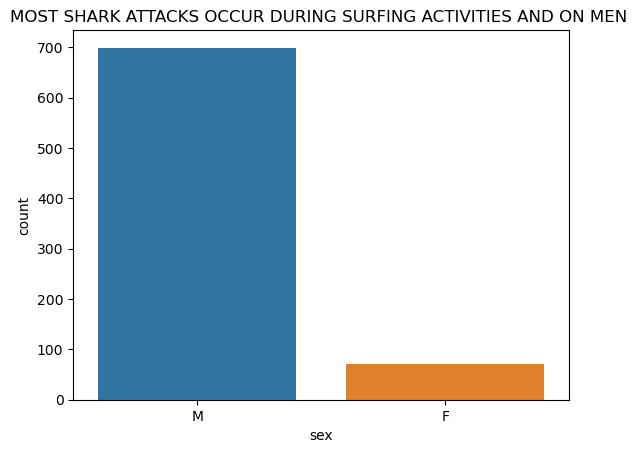

In [185]:
# MOST SHARK ATTACKS OCCUR DURING SURFING ACTIVITIES AND ON MEN 
df_surfing = df_00_23[df_00_23.activity == "Surfing"]
sns.countplot(x='sex', data=df_surfing) 
plt.title("MOST SHARK ATTACKS OCCUR DURING SURFING ACTIVITIES AND ON MEN ")

In [187]:
df_00_23

,date,year,type,country,state,location,activity,sex,age,time,...,source,pdf,href_formula,href,case_number,case_number.1,original_order,unnamed:_21,unnamed:_22,month
0,2024-03-15,2024,Unprovoked,AUSTRALIA,QUEENSLAND,BARGARA BEACH,Swimming,F,13,16h00,...,"Yahoo News, 3/15/2024",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3
1,2024-03-04,2024,Unprovoked,USA,HAWAII,"OLD MAN'S, WAIKIKI",Surfing,M,15,NaN,...,"Surfer, 3/6/2024F",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3
2,2024-03-02,2024,Unprovoked,USA,HAWAII,"RAINBOWS, OAHU",Swimming,F,11,13h30,...,"Hawaii News Now, 3/4/2024",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3
4,2024-02-14,2024,Unprovoked,INDIA,MAHARASHTRA,"VAITARNA RIVER, PALGHAR DISTRICT",Fishing,M,32,NaN,...,"Times of India, 2/14/2024",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
5,2024-02-04,2024,provoked,TRINIDAD,Indefined,Indefined,Spearfishing,M,15,06h30,...,"Trinidad Guardian, 2/11/2014",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2688,2000-02-14,2000,Provoked,ENGLAND,WORCESTERSHIRE,THE FOUNTAIN PUB IN TENBURY WELLS,Feeding prawns captive,M,15,NaN,...,"The Sun (London), 2/17/2000",2000.02.14-Smith.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2000.02.14,2000.02.14,4254.0,NaN,NaN,2
2689,2000-02-03,2000,Unprovoked,NEW ZEALAND,SOUTH ISLAND,ORETI BEACH (REPORTED AS THE 4TH PERSON BITTEN...,Surfing,M,15,NaN,...,"Waikato Times; Southland Times, 10/23/1999, p.1",2000.02.03-Petas.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2000.02.03,2000.02.03,4253.0,NaN,NaN,2
2690,2000-02-01,2000,Unprovoked,AUSTRALIA,SOUTH AUSTRALIA,"POINT SINCLAIR, CACTUS BEACH NEAR PENONG",Surfing,M,26,NaN,...,"T. Peake, GSAF",2000.02.01-Hayes.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2000.02.01,2000.02.01,4252.0,NaN,NaN,2
2691,2000-01-28,2000,Watercraft,REUNION,Indefined,SAINT PIERRE,Canoe 3 menboard,M,15,NaN,...,B.L. du Vendre,2000.01.28.R-Reunion.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2000.01.28.R,2000.01.28.R,4251.0,NaN,NaN,1


Text(0.5, 1.0, 'TOP 10 BY AGE')

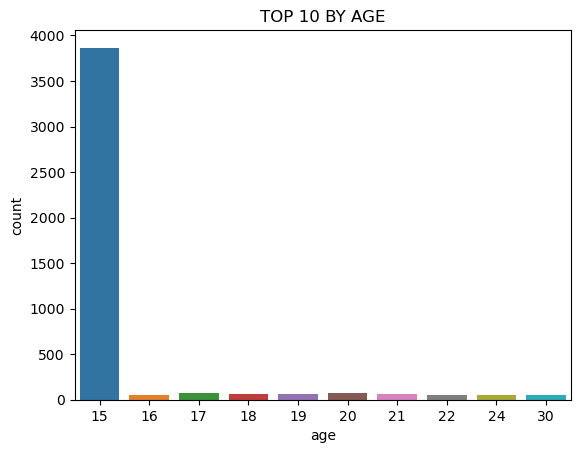

In [189]:
counts_age = sharks_df['age'].value_counts()                         # Count the occurrences of each country
top_10_age = counts_age.head(10).index                               # Top 10
filtered_top_age = sharks_df[sharks_df['age'].isin(top_10_age)]     # Filter the DataFrame to include only the top x
sns.countplot(x='age', data=filtered_top_age)                       # Bar chart
plt.title("TOP 10 BY AGE")

Text(0.5, 1.0, 'MOST SHARK ATTACKS OCCUR DURING THE SUMMER - all df')

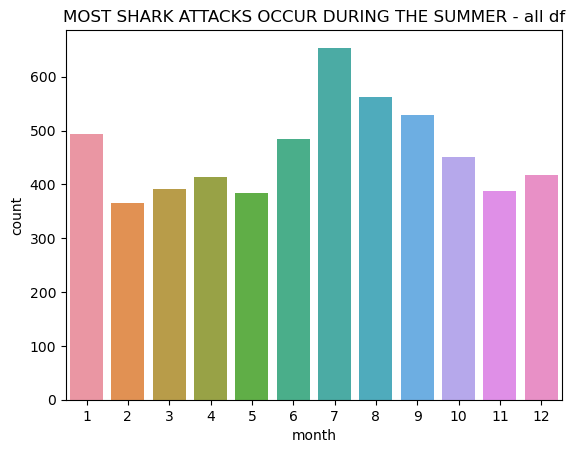

In [191]:
# MOST SHARK ATTACKS OCCUR DURING THE SUMMER
sns.countplot(x ='month', data = sharks_df)     
plt.title("MOST SHARK ATTACKS OCCUR DURING THE SUMMER - all df")

Text(0.5, 1.0, 'MOST SHARK ATTACKS OCCUR DURING THE SUMMER')

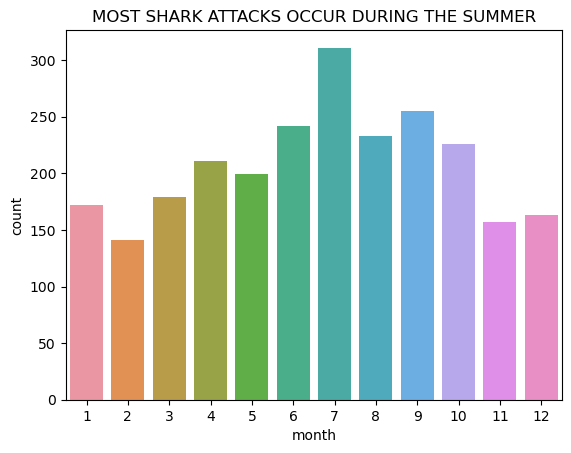

In [193]:
# MOST SHARK ATTACKS OCCUR DURING THE SUMMER
sns.countplot(x ='month', data = df_00_23)     
plt.title("MOST SHARK ATTACKS OCCUR DURING THE SUMMER")

In [ ]:
# GROUPING AND CHECKING HYPOTESIS // ALL DF after cleaning processes:

In [ ]:
# 1ST HYPOTESIS: MEN ARE MOSTLY ATTACKTED BY SHARKS

In [ ]:
group_sex = sharks_df.groupby("sex")["date"].count()
group_sex

In [ ]:
# 2ND HYPOTESIS: MOST SHARK ATTACKS OCCUR DURING THE SUMMER

In [ ]:
group_month = sharks_df["month"].value_counts()
group_monthç


In [ ]:
group_year = sharks_df["year"].value_counts()
group_year


In [ ]:
group_sex = sharks_df["sex"].value_counts()
group_sex

In [ ]:
group_month_country = sharks_df.groupby(["month","country"])[["date"]].count()
group_month_country.max()
max_month_country= group_month_country.idxmax()

In [ ]:
group_month_country.max()

In [ ]:
max_month_country

In [ ]:
# 3TH HYPOTESIS: MOST SHARK ATTACKS OCCUR DURING SURFING ACTIVITIES 
# 3.1 HYPOTESIS: MOST SHARK ATTACKS OCCUR DURING SURFING ACTIVITIES AND ON MEN

In [ ]:
group_activity = sharks_df["activity"].value_counts()
group_activity

In [ ]:
group_acti_sex = sharks_df.groupby(["activity","sex"])[["date"]].count()

In [ ]:
group_acti_sex.max()

In [ ]:
max_group_acti_sex = group_acti_sex.idxmax()
max_group_acti_sex  

In [ ]:
# 4RD HYPOTESIS: YONG PEOPLE, SPECIALLY IN AN AGE RANGE BETWEEN 18 AND 35 ARE MOSTLY ATTACKED BY SHARKS
# 4.1 HYPOTESIS: YONG PEOPLE, SPECIALLY MEN IN AN AGE RANGE BETWEEN 18 AND 35 ARE MOSTLY ATTACKED BY SHARKS

In [ ]:
group_age = sharks_df["age"].value_counts()
group_age

In [ ]:
group_age_sex = sharks_df.groupby(["age","sex"])[["date"]].count()

In [ ]:
max_group_age_sex = group_age_sex.idxmax()
max_group_age_sex

In [ ]:
group_age_sex.max()

In [ ]:
group_age_sex = group_age_sex.sort_values(by='date', ascending=False)
group_age_sex

In [ ]:
group_species = sharks_df["species_"].value_counts()
group_species 

In [ ]:
group_species = sharks_df["type"].value_counts()
group_species 

In [ ]:
sharks_df["age"].replace("provoked","Provoked", inplace=True)

In [ ]:
group_species = sharks_df["type"].value_counts()
group_species 

In [ ]:
# Ploting the total of years...
# We decided to focus our attention on the last 23 years, from 2000.
# GROUPING AND CHECKING HYPOTESIS FROM 2000 TO 2023

In [169]:
df_00_23 = sharks_df[sharks_df.year >= 2000]

In [171]:
df_00_23

,date,year,type,country,state,location,activity,sex,age,time,...,source,pdf,href_formula,href,case_number,case_number.1,original_order,unnamed:_21,unnamed:_22,month
0,2024-03-15,2024,Unprovoked,AUSTRALIA,QUEENSLAND,BARGARA BEACH,Swimming,F,13,16h00,...,"Yahoo News, 3/15/2024",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3
1,2024-03-04,2024,Unprovoked,USA,HAWAII,"OLD MAN'S, WAIKIKI",Surfing,M,15,NaN,...,"Surfer, 3/6/2024F",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3
2,2024-03-02,2024,Unprovoked,USA,HAWAII,"RAINBOWS, OAHU",Swimming,F,11,13h30,...,"Hawaii News Now, 3/4/2024",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3
4,2024-02-14,2024,Unprovoked,INDIA,MAHARASHTRA,"VAITARNA RIVER, PALGHAR DISTRICT",Fishing,M,32,NaN,...,"Times of India, 2/14/2024",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
5,2024-02-04,2024,provoked,TRINIDAD,Indefined,Indefined,Spearfishing,M,15,06h30,...,"Trinidad Guardian, 2/11/2014",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2688,2000-02-14,2000,Provoked,ENGLAND,WORCESTERSHIRE,THE FOUNTAIN PUB IN TENBURY WELLS,Feeding prawns captive,M,15,NaN,...,"The Sun (London), 2/17/2000",2000.02.14-Smith.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2000.02.14,2000.02.14,4254.0,NaN,NaN,2
2689,2000-02-03,2000,Unprovoked,NEW ZEALAND,SOUTH ISLAND,ORETI BEACH (REPORTED AS THE 4TH PERSON BITTEN...,Surfing,M,15,NaN,...,"Waikato Times; Southland Times, 10/23/1999, p.1",2000.02.03-Petas.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2000.02.03,2000.02.03,4253.0,NaN,NaN,2
2690,2000-02-01,2000,Unprovoked,AUSTRALIA,SOUTH AUSTRALIA,"POINT SINCLAIR, CACTUS BEACH NEAR PENONG",Surfing,M,26,NaN,...,"T. Peake, GSAF",2000.02.01-Hayes.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2000.02.01,2000.02.01,4252.0,NaN,NaN,2
2691,2000-01-28,2000,Watercraft,REUNION,Indefined,SAINT PIERRE,Canoe 3 menboard,M,15,NaN,...,B.L. du Vendre,2000.01.28.R-Reunion.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2000.01.28.R,2000.01.28.R,4251.0,NaN,NaN,1


In [ ]:
sharks_df.year.isna().sum()

In [ ]:
# 1ST HYPOTESIS: MEN ARE MOSTLY ATTACKTED BY SHARKS, FROM 2000 TO 2023

In [ ]:
group_sex = df_00_23["sex"].value_counts()
group_sex

In [ ]:
# 2ND HYPOTESIS: MOST SHARK ATTACKS OCCUR DURING THE SUMMER, FROM 2000 TO 2023

In [ ]:
group_month = df_00_23["month"].value_counts()
group_month

In [ ]:
group_sex = df_00_23["sex"].value_counts()
group_sex

In [ ]:
group_month_country = df_00_23.groupby(["month","country"])[["date"]].count()
group_month_country.max()
max_month_country= group_month_country.idxmax()

In [ ]:
group_month_country.max()

In [ ]:
max_month_country

In [ ]:
# 3TH HYPOTESIS: MOST SHARK ATTACKS OCCUR DURING SURFING ACTIVITIES , FROM 2000 TO 2023
# 3.1 HYPOTESIS: MOST SHARK ATTACKS OCCUR DURING SURFING ACTIVITIES AND ON MEN , FROM 2000 TO 2023

In [ ]:
group_activity = df_00_23["activity"].value_counts()
group_activity

In [ ]:
group_acti_sex = df_00_23.groupby(["activity","sex"])[["date"]].count()

In [ ]:
group_acti_sex.idxmax()

In [ ]:
# 4RD HYPOTESIS: YONG PEOPLE, SPECIALLY IN AN AGE RANGE BETWEEN 18 AND 35 ARE MOSTLY ATTACKED BY SHARKS, FROM 2000 TO 2023
# 4.1 HYPOTESIS: YONG PEOPLE, SPECIALLY MEN IN AN AGE RANGE BETWEEN 18 AND 35 ARE MOSTLY ATTACKED BY SHARKS, FROM 2000 TO 2023

In [ ]:
group_age = df_00_23["age"].value_counts()
group_age

In [ ]:
group_age_sex = df_00_23.groupby(["age","sex"])[["date"]].count()

In [ ]:
max_group_age_sex = group_age_sex.idxmax()
max_group_age_sex

In [ ]:
group_age_sex.max()

In [ ]:
group_age_sex = group_age_sex.sort_values(by='date', ascending=False)
group_age_sex

In [ ]:
group_species = df_00_23["species_"].value_counts()
group_species 

In [ ]:
group_species = df_00_23["type"].value_counts()
group_species 

In [ ]:
group_species = df_00_23["type"].value_counts()
group_species 